In [1]:
import numpy as np
from numpy import linalg as LA
from scipy import linalg
from scipy.linalg import eigh
import time
import matplotlib.pyplot as plt

In [2]:
# Generate Random Hermitian Matrix, 'A' called 'b_symm'
def createAmat(N):
    b = np.random.randint(-20,20,size=(N,N))
    b_symm = (b + b.T)/2
    return b_symm
    
N = 1000
dim=1000
itr=50
b = np.random.randint(-20,20,size=(N,N))
b_symm = (b + b.T)/2
print(b_symm)

[[  4.   -1.5   3.5 ...   9.5  10.   -8. ]
 [ -1.5 -15.    4.5 ...  -3.5  13.   -1.5]
 [  3.5   4.5  -6.  ...   2.5  -4.   -2. ]
 ...
 [  9.5  -3.5   2.5 ... -13.   10.   18. ]
 [ 10.   13.   -4.  ...  10.   19.   -2. ]
 [ -8.   -1.5  -2.  ...  18.   -2.    2. ]]


In [3]:
def constructEig(alphas,betas,colsV):
    triDiag=np.diag(alphas)
    icount=1
    for i in range(len(betas)):
        triDiag[i][icount]=betas[i]
        triDiag[icount][i]=triDiag[i][icount]
        icount=icount+1
    
    eigVec=np.array(colsV)
    return triDiag,eigVec

In [4]:
def orthoCols(colsV,dim):
    print('\n Checking columns of V are orthogonal.... ')
    for i in range(dim):
        print('Column ',i, 'has norm: ', LA.norm(colsV[i]))
    print('\n')

In [5]:
def normalCols(colsV,dim):
    print('\n Checking (subset) of the columns of V are normal w.r.t each other.... ')
    j=1
    for i in range(dim):
        if (j>dim-1):
            break
        print('Columns ',i, '& ',j,' have dot product: ', np.dot(colsV[i],colsV[j]))
        j=j+1
        
    print('\n')
        

In [6]:
def checkFinalAns(Aorig, V, T):
    print('\n Multiplying V^*TV and comparing against original A.... ')
    testA=np.matmul(np.matmul(V.T,T),V)
    for i in range(len(Aorig[0])):
        for j in range(i):
            if (abs(testA[i][j])-abs(Aorig[i][j]) > 0.000001):
                print('The original A matrix and Lanczos A matrix are not equivalent')
                break

    print("\n ****  Matrices are equivalent; Lanczos succeeds!!!!   ****")
  

In [7]:
# Performs the Lanczos algorithm and verifies results. Computes A=V^*TV if the dimensions
# are correct. The Lanczos algo transforms the eigendecomposition problem for A
# into the eigendecomposition problem for T.
#
# Input: Hermitian matrix, 'A'.
#        Dimension of A (m x m), 'dim'
#        Dimension of initial vector vj, 'itr'. 'itr'==n and vj is an element of C^n
# Output: Obtains tridiagonal, symmetric matrix - T - and corresponding orthonormal eigenvector 
#         matrix - V. The resulting matrix is diagonalized to obtain the correct 
#         eigenspectrum of A, using exterior algorithms. 
#
#  SIZE(A)=m x m, SIZE(V)=n x m, and SIZE(T)=m x m
# ** NOTE ** If n=m, then V is unitary and A=V^*TV
def Lanczos(Amat,dim=3,itr=3):
    colsV=[]
    alphas=[]
    betas=[]
    
    # Initialize first iteration of Lanczos
    v1=np.random.randint(-5,5,dim)
    normv1=v1/LA.norm(v1, 2)    
    w1=Amat.dot(normv1)
    alpha1=(w1.T).dot(normv1)    
    w1=w1-alpha1*normv1
    # Store initial alpha and vj for later
    alphas.append(alpha1)
    colsV.append(normv1)
    global a1,a2,a3,a4,a5
    a1=[]
    a2=[]
    a3=[]
    a4=[]
    a5=[]
    # Iterate according to the number of roots requested
    for i in range(1,itr):
        beta=LA.norm(w1,2)
        if (abs(beta)>0.00000001):
            vj=w1/beta
        #else: *ADD LOGIC IF BETA==0


        w1=Amat.dot(vj)
        alpha1=(w1.T).dot(vj)
        w1=w1-alpha1*vj - beta*colsV[i-1]
        
        # Orthogonalize w1
        for j in range(i):
            tmp=np.dot(w1,colsV[:][j])
            if tmp==0.0:
                continue
            w1 =w1-tmp*colsV[:][j]
            
            
        # Store this iterations alpha, beta, and vj 
        betas.append(beta)
        alphas.append(alpha1)
        colsV.append(vj)
        if i>4:
            tempT,tempV=constructEig(alphas,betas,colsV)
            w,v=eigh(tempT)
            a1.append(w[0])
            a2.append(w[1])
            a3.append(w[2])
            a4.append(w[3])
            a5.append(w[4])
            
    
    # Construct a "cleaned" T and V
    finalT,finalV=constructEig(alphas,betas,colsV)
      

    # Verify columns of V are orthonormal
    
    if (dim == itr):
        orthoCols(finalV,dim)
        normalCols(finalV,dim)
    
    # Verify the original matrix A is equivalent to V*TV, assuming itr is 
    # equal to the dimensionality of A. AKA dim(vj)==dim(A[0]), else don't 
    # perform this step.
    if (itr == dim ):
        checkFinalAns(Amat, finalV, finalT)
        
    return finalT,finalV

            
            

        

In [8]:
# Check via default scipy diagonalization routine
start=time.time()
w,v=eigh(b_symm)
end=time.time()
defaultSCIPY=end-start
print(w)
global CORRECTroots
CORRECTroots=np.sort(w)

[-6.34780336e+02 -5.07146225e+02 -5.05732577e+02 -5.03727863e+02
 -5.00408468e+02 -4.98727351e+02 -4.95429651e+02 -4.92485800e+02
 -4.89415203e+02 -4.85833258e+02 -4.84825228e+02 -4.81927717e+02
 -4.81386126e+02 -4.77855481e+02 -4.76066403e+02 -4.75162372e+02
 -4.72938511e+02 -4.70932304e+02 -4.66356318e+02 -4.64357484e+02
 -4.63516625e+02 -4.58667720e+02 -4.58134783e+02 -4.57385892e+02
 -4.55571751e+02 -4.52929477e+02 -4.51815217e+02 -4.50193278e+02
 -4.47701806e+02 -4.45687917e+02 -4.45185797e+02 -4.43795121e+02
 -4.42126796e+02 -4.41225320e+02 -4.41082458e+02 -4.40591254e+02
 -4.38254154e+02 -4.37107548e+02 -4.35119475e+02 -4.32079390e+02
 -4.31648069e+02 -4.31110641e+02 -4.28459351e+02 -4.28045673e+02
 -4.25794393e+02 -4.25063518e+02 -4.24194246e+02 -4.20780057e+02
 -4.20421060e+02 -4.19254550e+02 -4.17413570e+02 -4.15997199e+02
 -4.13920561e+02 -4.12397180e+02 -4.10227693e+02 -4.09563820e+02
 -4.09161384e+02 -4.08369752e+02 -4.07496902e+02 -4.05145808e+02
 -4.04238028e+02 -4.02726

In [9]:
#print(b_symm)
start=time.time()
T,V=Lanczos(b_symm,dim,itr)
end=time.time()
GramSchmidtTime=end-start

In [10]:
# Check via SVD; 
u, s, vh = np.linalg.svd(b_symm)
print(s)


[6.34780336e+02 5.11538714e+02 5.07146225e+02 5.05732577e+02
 5.04835671e+02 5.03727863e+02 5.00408468e+02 4.99534040e+02
 4.98727351e+02 4.97012768e+02 4.95429651e+02 4.94845790e+02
 4.92858070e+02 4.92485800e+02 4.91291182e+02 4.89415203e+02
 4.88735642e+02 4.85833258e+02 4.84825228e+02 4.84772343e+02
 4.83013297e+02 4.81927717e+02 4.81386126e+02 4.80988249e+02
 4.79084296e+02 4.77855481e+02 4.76229749e+02 4.76066403e+02
 4.75162372e+02 4.73830045e+02 4.72938511e+02 4.72228871e+02
 4.71479820e+02 4.70932304e+02 4.67721777e+02 4.66356318e+02
 4.65948216e+02 4.64364680e+02 4.64357484e+02 4.63516625e+02
 4.62273736e+02 4.61349145e+02 4.60277522e+02 4.59371926e+02
 4.58667720e+02 4.58134783e+02 4.57385892e+02 4.56336791e+02
 4.55730480e+02 4.55571751e+02 4.52929477e+02 4.52543360e+02
 4.51815217e+02 4.50998690e+02 4.50193278e+02 4.49611900e+02
 4.48187643e+02 4.47701806e+02 4.46155863e+02 4.45687917e+02
 4.45346987e+02 4.45185797e+02 4.43795121e+02 4.43450039e+02
 4.42126796e+02 4.420116

In [11]:
# Default diagonalization routine to diagonalize the tridiagonal, T, from Lanczos




In [12]:
# Verify sum of diagonal of T is same as sum of diagonal of default diagonalization above

print(np.sum(np.diag(T)))
print(np.diag(T))

print(np.diag(np.diag(T)))

-374.57410480820204
[   0.55368043  -48.1424142  -122.03155036 -107.6969941   -57.60351863
   -1.66592036    1.60515077   -8.37411223   14.68542371   13.84387769
    0.68766795   -5.84507687   -8.71051695    1.01834782   -2.38768362
   -6.33345509   -3.47329939    7.21755319    4.15526601   -6.14094095
   15.256886    -13.16277148    2.31952236  -17.5983153    -2.13478599
    5.62092452  -17.26544662    9.4171259     2.86395568    8.63444143
   -9.41363257   -7.79536105    1.57091537  -12.88927316   15.55295866
   -9.28855243    9.46229903    6.36191892   -6.23756232   -8.68743694
   13.15047102    2.52963189   -2.17829393   -7.36169694   12.37608518
  -12.10582886  -10.9935087    -5.18799302   -4.63762831    1.88536202]
[[   0.55368043    0.            0.         ...    0.
     0.            0.        ]
 [   0.          -48.1424142     0.         ...    0.
     0.            0.        ]
 [   0.            0.         -122.03155036 ...    0.
     0.            0.        ]
 ...
 [   0.  

In [18]:
def buildTk(alphas,betas,dim):
    triDiag=np.diag(alphas)
    icount=1
    for i in range(len(betas)):
        triDiag[i,icount]=betas[i]
        triDiag[icount][i]=triDiag[i][icount]
        icount=icount+1
    
    return triDiag

# WORKS
# FOLLOWED THIS SOURCE AS GUIDELINE:
# https://core.ac.uk/download/pdf/35469431.pdf
def LanczosIter(Amat,dim,iterations):
    Q=[]
    Tk=[]
    alphak=[]
    betak=[]
    beta0=1
    betaOLD=1
    q0=0
    b=np.random.randint(-20,20,dim) 
    q1=b/LA.norm(b, 2) # initial guess vector, append to cols of Q
    r0=q1
    Q.append(q1)
    I=np.identity(dim)
    global ERROR
    global lowestROOT
    lowestROOT=[]
    ERROR=[]
    oldeig=1
    for i in range(iterations):
        alpha=(q1.T).dot(Amat.dot(q1)) # project A onto q1
        r1=(Amat-alpha*I).dot(q1)-beta0*q0 # build new r1 orthogonal to old r1 vector
        beta0=LA.norm(r1,2) # normalize r1 
        
        alphak.append(alpha)
        betak.append(beta0)
        q0=q1
        q1=r1/beta0      #for new q1 from new r1
        Q.append(q1)
        if (i>=2):
            T=buildTk(alphak,betak[:-1],i)
            w, v = np.linalg.eig(T)
            ERROR.append(abs(CORRECTroots[0])-abs(np.sort(w)[0]))

            eig=np.sort(w)[0]
            cmp=abs(eig-oldeig)
            if (cmp<0.0001):
                print('\n *** Converged on iteration: ',i)
                break
            oldeig=eig
            if (i>=4):
                lowestROOT.append(np.sort(w)[:5])
                print('Lowest five roots for iteration ',i,': ',lowestROOT[i-4])
                print('alpha: ',alpha)
                print('Difference in lowest eigenvalues: ', cmp,'\n')

        
        tmp=beta0-betaOLD
        betaOLD=beta0
            

        
        
    print('final lowest roots per iteration: ',np.sort(lowestROOT[-1]))   
    print('finish in iteration: ',i)
#    print(q1)
#    print(((q1.T).dot(Amat)).dot(q1))

In [19]:

start=time.time()
iterations=50
LanczosIter(b_symm,N,iterations)
end=time.time()
LanczosTime=end-start
print('\n \n \n')
print('Default python routine diagonalizes matrix in ',defaultSCIPY, 'seconds')
print('Custom Lanczos scheme w/o intermediate orthonormalization obtains subset of roots in ',LanczosTime )
print('Custom Lanczos scheme with normalization obtains subset of roots in: ',GramSchmidtTime)

Lowest five roots for iteration  4 :  [-456.91734898 -263.95441366   -5.06120344  248.83111217  454.7655776 ]
alpha:  -38.90309298127809
Difference in lowest eigenvalues:  36.121000574972754 

Lowest five roots for iteration  5 :  [-484.03854309 -338.39179953 -124.09158619  111.2054584   313.0080752 ]
alpha:  -32.50288862378579
Difference in lowest eigenvalues:  27.121194111084264 

Lowest five roots for iteration  6 :  [-519.70494949 -406.5562363  -233.83813131  -29.33572533  181.67199136]
alpha:  -118.04947891883727
Difference in lowest eigenvalues:  35.66640639542874 

Lowest five roots for iteration  7 :  [-578.52388723 -452.81943502 -305.14875945 -119.75687494   68.8991708 ]
alpha:  -99.03050470612881
Difference in lowest eigenvalues:  58.81893774475077 

Lowest five roots for iteration  8 :  [-616.51430748 -471.36966903 -347.43462032 -197.23137348  -34.70731048]
alpha:  -57.70800118176658
Difference in lowest eigenvalues:  37.99042024954724 

Lowest five roots for iteration  9 : 

16
16


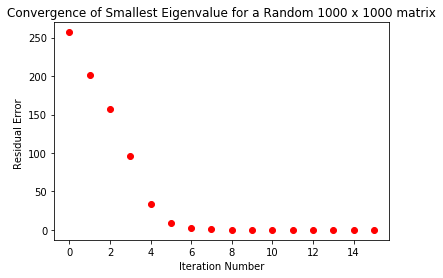

In [17]:
x=np.arange(0,len(ERROR))
print(len(x))
print(len(ERROR))
plt.figure()
plt.plot(x,ERROR,'ro')
plt.xlabel('Iteration Number')
plt.ylabel('Residual Error ')
plt.title("Convergence of Smallest Eigenvalue for a Random 1000 x 1000 matrix")
plt.savefig('lanczosConvergence.png',dpi=700)
plt.show()


In [ ]:
plt.figure()
x=np.arange(4,iterations)
print(np.shape(lowestROOT))
print(type(lowestROOT))
lowestROOT=np.array(lowestROOT)
print(lowestROOT)
#lowestROOT=np.asarray(lowestROOT)
#print(lowestROOT)
#print(np.resize(lowestROOT,(iterations,4)))
#lowestROOT=np.resize(lowestROOT,(iterations,4))
print('lowest root',lowestROOT[:,0])
print('x',x)
plt.plot(x,lowestROOT[:,0],'bo',label='Eig #1')
plt.plot(x,lowestROOT[:,1],'ro',label='Eig #2')
plt.plot(x,lowestROOT[:,2],'go',label='Eig #3')
plt.plot(x,lowestROOT[:,3],'ko',label='Eig #4')
plt.plot(x,lowestROOT[:,4],'yo',label='Eig #5')
plt.xlabel('Iteration 4<i<50 ')
plt.ylabel('Converged Eigenvalue')
plt.title('Root Fluctuation vs Iteration w.r.t Exact Eigenvalue')
plt.legend()
plt.savefig('lanczosEIG.png',dpi=700)
plt.show()

In [ ]:
sizes=[100,1000,5000,10000]
defaultTime=[]
LanczosTime=[]
for i in range(len(sizes)):
    Amat=createAmat(sizes[i])
    start=time.time()
    w,v=eigh(Amat)
    end=time.time()
    defaultTime.append(end-start)
    
    start=time.time()   
    LanczosIter(Amat,sizes[i],iterations)
    end=time.time()
    LanczosTime.append(end-start)
    

    
    
    

In [ ]:
plt.figure()
plt.plot(sizes,defaultTime,'ro',label="Default Python Algo")
plt.plot(sizes,LanczosTime,'bo',label="Custom Lanczos Algo")
plt.xlabel('Matrix Dimension')
plt.ylabel('Time to Diagonalize (s)')
plt.legend()
plt.show()



In [ ]:
def GenDavidson(Amat,dim=3,itr=10,initVec=3,eigNum=1,tol=0.001):
    colsV=np.zeros((dim,dim))
    I=np.eye(dim)
    r1=np.eye(dim,initVec) 
    for j in range(initVec): #stores 'initVec' # of unit vectors as init guess
        colsV[:,j]=r1[:,j]/np.linalg.norm(r1[:,j])
    
    thetaold=np.random.randint(10,size=initVec)
    global plota
    plota=[]
    # Iterate itr times, in steps of how many guess vectors user called
    for i in range(initVec,itr,initVec):
        colsV,R=np.linalg.qr(colsV) # QR decomposition immediately
        T=np.matmul(Amat,colsV[:,:(i+1)])
        T=np.matmul(colsV[:,:(i+1)].T,T) # T=V^t AV
        
        theta_i,X=np.linalg.eig(T)
        print('Eigenvalues: ',np.sort(theta_i)[:5])
        plota.append(np.sort(theta_i)[0])
        indx=theta_i.argsort()
        theta=theta_i[indx]
        x=X[:,indx] # choose smallest eigenvector of T

        norm=[]
        # Given new eigenvalue, build new guess vector 'r1'
        # Then apply shift to form 'q1'. Add to V, and on next 
        # iteration, re-normalize using QR
        for j in range(0,initVec):
            r1=(Amat-theta[j]*I).dot(np.dot(colsV[:,:(i+1)],X[:,j]))
            q1=r1/(theta[j]-Amat[j,j])
            colsV[:,i+j+1]=q1
            
        print('List of Residual Norms for iteration ',i/initVec,': ', + 
              np.absolute(theta[:initVec]- thetaold),'\n')

        # Stop if difference b/t successive eigvalues are below threshhold
        tmp=np.absolute(theta[:initVec]- thetaold)
        if (np.linalg.norm(tmp,2)<tol):
            print('** Converged on interation \n \n',i/initVec)
            break
        oldnorm=norm
        thetaold=theta[:initVec]
            
        
    return plota, theta, colsV



In [ ]:
dim = 1000    # Dimension of matrix
tol = 1e-4    # Convergence tolerance
itr = 200    # Maximum number of iterations	

''' Create sparse, diagonally dominant matrix A with 
    diagonal containing 1,2,3,...n. The eigenvalues
    should be very close to these values. You can 
    change the sparsity. A smaller number for sparsity
    increases the diagonal dominance. Larger values
    (e.g. sparsity = 1) create a dense matrix
'''

sparsity = 0.0001
Amat = np.zeros((dim,dim))
for i in range(0,dim):
    Amat[i,i] = i + 1
Amat = Amat + sparsity*np.random.randint(20,size=(dim,dim)) 
#Amat = (Amat.T + Amat)/2 
d, v = np.linalg.eig(Amat) 
print(np.sort(d))
DAVIDeig=np.sort(d)[0]

In [ ]:
initVec = 5   # number of initial guess vectors 
eigNum = 1   # number of eignvalues to solve 
itr=100

In [ ]:
plota,theta,V=GenDavidson(Amat,dim,itr,initVec,eigNum,tol=0.0001)

In [ ]:
sparsity = [0.0001,0.001,0.01,0.1,1.0]
davidsonEigPlot=[]
eigPlot=[]
for j in range(len(sparsity)):
    Amat = np.zeros((dim,dim))
    for i in range(0,dim):
        Amat[i,i] = i + 1
    Amat = Amat + sparsity[j]*np.random.randint(20,size=(dim,dim)) 
    Amat = (Amat.T + Amat)/2 
    d, v = np.linalg.eig(Amat) 
    eig=np.sort(d)[0]
    plota,theta,V=GenDavidson(Amat,dim,itr,initVec,eigNum,tol=0.001)
    plota=[plota[i]-eig for i in range(len(plota))]
    davidsonEigPlot.append(plota)

In [ ]:
plt.figure()
itr=np.arange(0,195,5)
#color=['ro','bo','go','yo','ko']
for i in range(len(sparsity)-1):
    plt.plot(itr,davidsonEigPlot[i],'o',label='%1.4f'%sparsity[i])
    
plt.xlim(-5,105)
plt.xlabel("Iteration number")
plt.ylabel("Relative Error")
plt.title("Convergence of Lowest Eigenvalue vs Iteration")
plt.legend(title='Sparsity Factor')
plt.savefig('davidSparsity.png',dpi=1000)
plt.show()
    

In [ ]:
initVec = [1,5,10,50]   # number of initial guess vectors 
eigNum = 1    # number of eignvalues to solve 


dim = 1000    # Dimension of matrix
tol = 1e-4    # Convergence tolerance
itr = 500    # Maximum number of iterations	

''' Create sparse, diagonally dominant matrix A with 
    diagonal containing 1,2,3,...n. The eigenvalues
    should be very close to these values. You can 
    change the sparsity. A smaller number for sparsity
    increases the diagonal dominance. Larger values
    (e.g. sparsity = 1) create a dense matrix
'''

sparsity = 0.0001
Amat = np.zeros((dim,dim))
for i in range(0,dim):
    Amat[i,i] = i + 1
Amat = Amat + sparsity*np.random.randint(20,size=(dim,dim)) 
#Amat = (Amat.T + Amat)/2 
d, v = np.linalg.eig(Amat) 
print(np.sort(d))
DAVIDeig=np.sort(d)[0]


    

In [ ]:

davidEig=[]
for i in range(len(initVec)):
    plota,theta,V=GenDavidson(Amat,dim,itr,initVec[i],eigNum,tol=0.001)
    davidEig.append(plota)
    


In [ ]:
plt.figure()
itr=np.arange(0,195,5)
b=[200,195,190,150]
for i in range(len(initVec)):
    #plt.plot(np.arange(1,b[i],initVec[i]),davidEig[i],'o',label='%1.0f'%initVec[i])
    plt.plot(np.arange(0,len(davidEig[i])),davidEig[i],'o',label='%1.0f'%initVec[i])

plt.xlim(-1,25)
plt.xlabel("Iteration number")
plt.ylabel("Relative Error")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.suptitle("Convergence of Lowest Eigenvalue vs Iteration")
plt.legend(title='Number of Initial Guess Vectors')
plt.savefig('davidInitialGuess.png',dpi=1000)
plt.show()

In [ ]:
x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]

In [ ]:
x[:][0]

In [ ]:
x=np.array(x)

In [ ]:
x[:,0]

In [ ]:
sparsity = 0.01
dim=1000
Amat = np.zeros((dim,dim))
for i in range(0,dim):
    Amat[i,i] = i + 1
Amat = Amat + sparsity*np.random.randint(20,size=(dim,dim)) 
#Amat = (Amat.T + Amat)/2 
start=time.time()
d, v = np.linalg.eig(Amat)
end=time.time()
NumpyTime=end-start
print(np.sort(d)[0:5])
DAVIDeig=np.sort(d)[0]
CORRECTroots=np.sort(d)

In [ ]:
start=time.time()
iterations=100
LanczosIter(Amat,dim,iterations)
end=time.time()
LanczosTime=end-start


In [ ]:
initVec = 1   # number of initial guess vectors 
eigNum = 1   # number of eignvalues to solve 
tol=0.0001
start=time.time()
plota,theta,V=GenDavidson(Amat,dim,iterations,initVec,eigNum,tol=0.0001)
end=time.time()
DavidTime=end-start

initVec = 5 
start=time.time()
plota,theta,V=GenDavidson(Amat,dim,iterations,initVec,eigNum,tol=0.0001)
end=time.time()
DavidTime5=end-start


initVec = 10 
start=time.time()
plota,theta,V=GenDavidson(Amat,dim,iterations,initVec,eigNum,tol=0.0001)
end=time.time()
DavidTime10=end-start

initVec = 50 
start=time.time()
plota,theta,V=GenDavidson(Amat,dim,iterations,initVec,eigNum,tol=0.0001)
end=time.time()
DavidTime50=end-start

In [ ]:
print("\t\t** Time Comparison (seconds) **")
print("Davidson (1 initial guess vector): \t",DavidTime)
print("Davidson (5 initial guess vector): \t",DavidTime5)
print("Davidson (10 initial guess vector): \t",DavidTime10)
print("Davidson (50 initial guess vector): \t",DavidTime50)
print("Lanczos: \t\t\t\t", LanczosTime)
print("Default Numpy: \t\t\t\t",NumpyTime)

In [ ]:
print("\t\t\t\t** Comparison of first 5 eigenvalues **")
print("Default Numpy: \t \t\t\t",CORRECTroots[:5])
print('Davidson (50 initial guess vectors): \t', theta[:5])
print("Lanczos: \t\t\t\t",lowestROOT[-1])

In [ ]:
1.05260919-1.07046677